<a href="https://colab.research.google.com/github/kwaldenphd/more-with-matplotlib/blob/main/pandas_plotting_resources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Environment

In [3]:
# install packages
import sys
! {sys.executable} -m pip install geopandas
! {sys.executable} -m pip install shapely

     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 50.2 MB/s 
     |████████████████████████████████| 16.7 MB 387 kB/s 


In [4]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
from shapely.geometry import Point
warnings.filterwarnings('ignore')

# Load Data

We'll be using three sample datasets in the Exploratory Data Analysis section of the lab.

`ND_Directory_Cleaned_Geography.csv` represents a data structure based on the 1922-1923 student directory. Fields in the dataset include:
- `Combined_Name_Original` (combined first name, last name, and major field)
- `Combined_Name` (combined first name, last name field)
- `Last_Name` (standarized last name)
- `First_Name` (standardized first name)
- `Major` (standardized major)
- `Combined_Address` (combined street, city, state, and country field)
- `Street` (standardized-ish street)
- `City` (standardized city)
- `State` (standardized state)
- `Country` (standardized country)
- `Standardized_Address` (standardized combined street, city, state, country field)
- `Standardized_City_State` (standardized city, state, country field)
- `Country` (standardized country)
- `Latitude` (latitude)
- `Longitude` (longitude)

`combined_nd_rosters.csv` represents a data structure scraped from Sports Reference's Notre Dame college football season roster pages. Fields in the dataset include:
- `Rk` (player rank on team at end of season)
- `Season` (season)
- `Player` (combined player name field)
- `First_Name` (player first name)
- `Last_Name` (player last name)
- `G` (number of games)
- `RushingAtt` (number of rushing yards attempted)
- `RushingYds` (number of actual rushing yards)
- `RushingAvg` (average number of rushing yards per attempt)
- `RushingTD` (number of rushing touchdowns)
- `ReceivingRec` (number of receiving receptions)
-  `ReceivingYds` (number of receiving yards)
-  `ReceivingAvg` (average number of receiving yards per reception)
-  `ReceivingTD` (number of receiving touchdowns)
-  `ScrimmagePlays` (number of plays from scrimmage, rush attempts + receptions)
-  `ScrimmageYds` (number of scrimmage yards, rushing + receiving yards)
-  `ScrimmageAvg` (average number of yards from scrimmage per play)
-  `ScrimmageTD` (number of touchdowns from scrimmage, receiving + rushing touchdowns)

`combined_nd_schedules_cleaned.csv` represents a data structure scraped from Sports Reference's Notre Dame college football season results pages. Fields in the dataset include:
- `G` (game number)
- `Season` (season or year)
- `Standarized_Date` (standardized game date, YYYY-MM-DD)
- `Date` (original date field, MM DD, YYYY)
- `Day` (game day of week)
- `Time` (game time of day)
- `School` (Notre Dame, includes ranking)
- `Standardized_School` (standardized Notre Dame school field, does not include ranking)
- `Game_Type` (home, away, neutral site game)
- `Opponent` (opponent, includes ranking)
- `Standarized_Opponent` (standardized opponent school field, does not include ranking)
- `Post_Season` (Y/N field indicating if game is postseason/bowl/playoff game)
- `Conf` (conference)
- `Result` (W/L/T game result)
- `Combined_Location` (combined game location, location/city/state/country)
- `City` (game site city)
- `State` (game site state)
- `Country` (game site country)
- `Pts` (number of ND points in game)
- `Opp` (number of opponent points in game`
- `W` (win number)
- `L` (loss number)
- `T` (tie number)
- `Streak` (W/L/T streak)
- `Notes` (additional notes on game)
- `Latitude` (latitude)
- `Longitude` (longitude)

For more background on these datasets:
- [`1922-1923 Student Directory`](https://github.com/kwaldenphd/football-structured-data/blob/main/background.md#directories-data-processing-overview)
- [`ND Football Rosters`](https://github.com/kwaldenphd/football-structured-data/blob/main/background.md#football-rosters-data-processing-overview)
- [`ND Football Schedules`](https://github.com/kwaldenphd/football-structured-data/blob/main/background.md#football-schedules-data-processing-overview)


The code provided below loads the data from GitHub URLs. 

To download `.csv` files from Google Drive:
- [`ND_Directory_Cleaned_Geography.csv`](https://drive.google.com/file/d/1x35ml-UUykUnMUXUjtI3VjTvHMT3UCS7/view?usp=sharing)
- [`combined_nd_rosters.csv`](https://drive.google.com/file/d/1LpT-mjNxvvmqsDV0pFmFBFvb8PSwJiTj/view?usp=sharing)
- [`combined_nd_schedules_cleaned.csv`](https://drive.google.com/file/d/15U5nNbKX-BfIWO4CTCeabit7mdokf9SV/view?usp=sharing)



## 1922-1923 Student Directory

In [5]:
# load directory data from file
# directory = pd.read_csv("ND_Directory_Cleaned_Geography.csv")

# load directory data from url
directory = pd.read_csv("https://raw.githubusercontent.com/kwaldenphd/more-with-matplotlib/main/data/ND_Directory_Cleaned_Geography.csv")

# inspect dataframe
directory

,Combined_Name,Last_Name,First_Name,Major,Combined_Address,Street,City,State,Standardized_Address,Standardized_City_State,Country,Latitude,Longitude
0,"Chawin, Roy A. Jour. 1",Chawin,Roy A.,Jour,"Charity St., Abbeville, La.",Charity St.,Abbeville,Louisiana,"Charity St., Abbeville, Louisiana, USA","Abbeville, Louisiana, USA",USA,29.972503,-92.127504
1,"James, John J. Law",James,John J.,Law,"Ackly, Iowa",NaN,Ackly,Iowa,"Ackly, Iowa, USA","Ackly, Iowa, USA",USA,42.039943,-93.500069
2,"Nyikos, Joseph W. Law 4",Nyikos,Joseph W.,Law,"613 Frank St., Adrian, Mich.",613 Frank St.,Adrian,Michigan,"613 Frank St., Adrian, Michigan, USA","Adrian, Michigan, USA",USA,41.89791,-84.037938
3,"Hassman, Thomas R. Pre. Law",Hassman,Thomas R.,Law,"Aitkins, Minn.",NaN,Aitkins,Minnesota,"Aitkins, Minnesota, USA","Aitkins, Minnesota, USA",USA,46.63636,-94.579641
4,"Doran, Patrick C. Litt. B. 4",Doran,Patrick C. Litt. B. 4,NaN,"111 South Maple St., Akron, Ohio",111 South Maple St.,Akron,Ohio,"111 South Maple St., Akron, Ohio, USA","Akron, Ohio, USA",USA,41.078597,-81.538184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,"Judie, James Albert Law 3",Judie,James Albert,Law,"865 Arlington St., Youngstown, Ohio",865 Arlington St.,Youngstown,Ohio,"865 Arlington St., Youngstown, Ohio, USA","Youngstown, Ohio, USA",USA,41.098842,-80.652223
1629,"De Graff, Oreal A. Law Spec.",De Graff,Oreal A.,Law,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1630,"Feldman, Morris D. Law 3",Feldman,Morris D.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,"Hunt, Hiram H. Law 4",Hunt,Hiram H.,Law,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Notre Dame Football Rosters

In [6]:
# load roster data from file
# roster = pd.read_csv("combined_nd_rosters.csv")

# load roster data from url
rosters = pd.read_csv("https://raw.githubusercontent.com/kwaldenphd/more-with-matplotlib/main/data/combined_nd_rosters.csv")

# inspect dataframe
rosters

,Rk,Season,Player,First_Name,Last_Name,G,RushingAtt,RushingYds,RushingAvg,RushingTD,ReceivingRec,ReceivingYds,ReceivingAvg,ReceivingTD,ScrimmagePlays,ScrimmageYds,ScrimmageAvg,ScrimmageTD
0,1,1924,Jimmy Crowley,Jimmy,Crowley,10.0,133.0,742.0,5.6,6.0,11.0,274.0,24.9,2.0,144,1016,7.1,8
1,2,1924,Don Miller,Don,Miller,9.0,125.0,794.0,6.4,5.0,19.0,346.0,18.2,2.0,144,1140,7.9,7
2,3,1924,Elmer Layden,Elmer,Layden,9.0,120.0,445.0,3.7,6.0,NaN,NaN,NaN,NaN,120,445,3.7,6
3,4,1924,Bernie Livergood,Bernie,Livergood,10.0,53.0,229.0,4.3,2.0,1.0,22.0,22.0,1.0,54,251,4.6,3
4,5,1924,Doc Connell,Doc,Connell,10.0,46.0,268.0,5.8,1.0,4.0,65.0,16.3,0.0,50,333,6.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,18,2020,Lawrence Keys lll,Lawrence,Keys lll,5.0,NaN,NaN,NaN,NaN,5.0,51.0,10.2,0.0,5,51,10.2,0
1632,19,2020,George Takacs,George,Takacs,3.0,NaN,NaN,NaN,NaN,3.0,30.0,10.0,0.0,3,30,10.0,0
1633,20,2020,Brock Wright,Brock,Wright,3.0,NaN,NaN,NaN,NaN,3.0,21.0,7.0,0.0,3,21,7.0,0
1634,21,2020,Kevin Austin,Kevin,Austin,1.0,NaN,NaN,NaN,NaN,1.0,18.0,18.0,0.0,1,18,18.0,0


## Notre Dame Football Schedules

In [7]:
# load schedule data from file
# schedule = pd.read_csv("combined_nd_schedules_cleaned.csv")

# load schedule data from url
schedule = pd.read_csv("https://raw.githubusercontent.com/kwaldenphd/more-with-matplotlib/main/data/combined_nd_schedules_cleaned.csv")

# inspect dataframe
schedule

,G,Season,Standardized_Date,Date,Day,Time,School,Standardized_School,Game_Type,Opponent,...,Country,Pts,Opp,W,L,T,Streak,Notes,Latitude,Longitude
0,5,1899,10/18/1899,"Oct 18, 1899",Wed,NaN,Notre Dame,Notre Dame,Away,Michigan,...,USA,0,12,3,2,0.0,L 1,NaN,42.279731,-83.736923
1,3,1899,10/4/1899,"Oct 4, 1899",Wed,NaN,Notre Dame,Notre Dame,Away,Chicago,...,USA,6,23,2,1,0.0,L 1,NaN,41.878970,-87.660630
2,1,1899,9/27/1899,"Sep 27, 1899",Wed,NaN,Notre Dame,Notre Dame,Home,Englewood High,...,USA,29,5,1,0,0.0,W 1,NaN,41.666386,-86.267592
3,6,1899,10/23/1899,"Oct 23, 1899",Mon,NaN,Notre Dame,Notre Dame,Home,Indiana,...,USA,17,0,4,2,0.0,W 1,NaN,41.666386,-86.267592
4,4,1899,10/14/1899,"Oct 14, 1899",Sat,NaN,Notre Dame,Notre Dame,Home,Lake Forest,...,USA,38,0,3,1,0.0,W 1,NaN,41.666386,-86.267592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,1,2020,9/12/2020,12-Sep-20,Sat,2:30 PM,(10)Â Notre Dame,Notre Dame,Home,Duke,...,USA,27,13,1,0,NaN,W 1,NaN,41.666386,-86.267592
969,3,2020,10/10/2020,10-Oct-20,Sat,7:30 PM,(5)Â Notre Dame,Notre Dame,Home,Florida State,...,USA,42,26,3,0,NaN,W 3,NaN,41.666386,-86.267592
970,4,2020,10/17/2020,17-Oct-20,Sat,2:30 PM,(4)Â Notre Dame,Notre Dame,Home,Louisville,...,USA,12,7,4,0,NaN,W 4,NaN,41.666386,-86.267592
971,2,2020,9/19/2020,19-Sep-20,Sat,2:30 PM,(7)Â Notre Dame,Notre Dame,Home,South Florida,...,USA,52,0,2,0,NaN,W 2,NaN,41.666386,-86.267592


# Plotting Football Schedule Data

## Add `DateTime` Object

In [8]:
# create datetime object from Standardized_Date field
schedule['Datetime'] = pd.to_datetime(schedule['Standardized_Date'])

# make new datatime column the index
schedule.set_index(['Datetime'], inplace=True)

# check updated dataframe
# schedule.head()

In [ ]:
# get list of dataframe columns
schedule.info()

## Basic Plotting Syntax

A couple examples for plotting all numeric values in the `DataFrame` and a specific column in the `DataFrame`.

The default settings for `Pandas` plotting functions:
- `index` (in this case `DateTime`) is the `x` axis data
- Numeric columns are the `y` axis data
- Default plot type is a line plot
- Default axis title(s) and legend are pulled from information in the underlying `DataFrame`

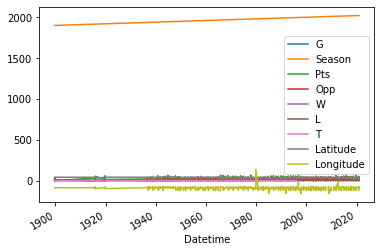

In [ ]:
# basic syntax for plotting the entire dataframe
schedule.plot()

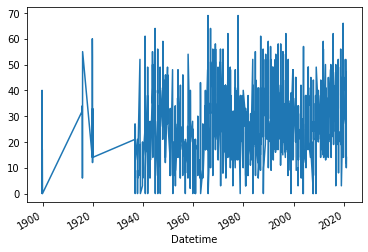

In [ ]:
# basic syntax for plotting single column from dataframe
schedule['Pts'].plot()

We can customize the plot using parameters that work directly within the `Pandas` plotting function.


Parameter | Explanation
--- | ---
`ax` | `matplotlib` `axes` object; axes for the current figure
`subplots` | Default is `False`; set to `True` to enable multiple plots in the same figure
`layout` | Follows `(rows, columns)` syntax to set subplot layout
`figsize` | Follows `(width, height)` syntax; Sets figure object width and height in inches
`use_Index` | Default is `True`; uses dataframe index as ticks for `X` axis
`title` | Title to use for the plot; can take a list with titles for corresponding subplots
`grid` | Default is `False`; set to `True` to show axis grid lines
`legend` | Places legend on axis subplot
`xticks` | Values to use for `X` axis ticks
`yticks` | Values to use for `Y` axis ticks
`xlim` | Follows `(lower limit, upper limit)` syntax; Sets `X` axis limits
`ylim` | Follows `(lower limit, upper limit)` syntax; Sets `Y` axis limits
`xlabel` | Label for `X` axis; default uses index column name
`ylabel` | Label for `Y` axis; default uses `Y` column name
`fontsize` | Sets font size for tickmarks
`colormap` | Sets `matplotlib` colormap to select colors from
`table` | Default is `False`; set to `True` to draw a table from data in the `DataFrame`
`stacked` | Default is `False` in line and bar plots, `True` in area plot; if `True`, creates stacked plot

- For more parameters that can be passed to `.plot()`: [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

A few examples that set axis labels, plot title, etc.

In [ ]:
# add axis labels and plot title
schedule['Pts'].plot(xlabel = 'Season', ylabel='Total Points', title='Total Number of Points by Season')

In [ ]:
# previous example, with grid set to True and color set to green
schedule['Pts'].plot(xlabel = 'Season', ylabel='Total Points', title='Total Number of Points by Season', grid=True, color='green')

In [ ]:
# previous example, with adjusted font size
schedule['Pts'].plot(xlabel = 'Season', ylabel='Total Points', title='Total Number of Points by Season', grid=True, color='green', fontsize=12)

## Using Core `matplotlib` syntax with data in a `Pandas` DataFrame

There are a few different options for integrating core `matplotlib` syntax and workflows with data in a `Pandas` DataFrame and `Pandas` plotting functions.

The most straightforward workflow is to assign the `Pandas` plotting function output to a `Matplotlib` axes variable (i.e. `ax`).

In [ ]:
# create figure with axes
fig, ax = plt.subplots()


# axes object from pandas plotting function
ax = schedule['Pts'].plot(xlabel = 'Season', ylabel='Total Points', title='Total Number of Points by Season')

# show plot
plt.show()

We can use that workflow to set axis labels and the plot title using core `Matplotlib` syntax.

In [ ]:
# create figure with axes
fig, ax = plt.subplots()

# axes object from pandas plotting function
ax = schedule['Pts'].plot()

# set x axis label
ax.set_xlabel("Season")

# set y axis label
ax.set_ylabel("Total Points")

# set plot title
ax.set_title("Total Number of Points by Season")

# show plot
plt.show()

A couple different programs that use different syntax to generate the same line plot.

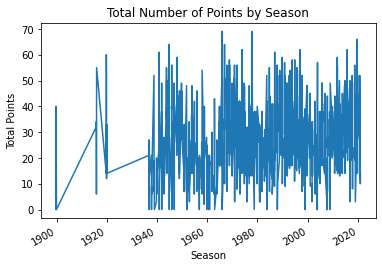

In [9]:
# just using pandas plotting function
schedule['Pts'].plot(xlabel='Season', ylabel='Total Points', title='Total Number of Points by Season')

In [ ]:
# using ax parameter in pandas plotting function and core matplotlib syntax for labels
fig, ax = plt.subplots()

schedule['Pts'].plot(ax=ax)

ax.set_xlabel("Season")
ax.set_ylabel("Total Points")
ax.set_title("Total Number of Points by Season")

plt.show()

## Other Types of Plots

A few examples of other plot types that use `Pandas` plotting functions with the ND Football schedule data.

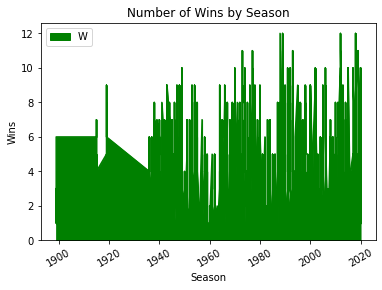

In [ ]:
# area plot with 'Season' on the X axis and number of wins 'W' on the Y axis; x tick mark rotation set to 30 degreees
schedule.plot.area(x="Season", y="W", xlabel='Season', rot=30, ylabel='Wins', title='Number of Wins by Season', color='green')

### Plotting Categorical Data Using `.groupby()` and `.size()`

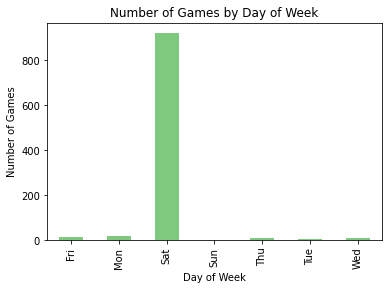

In [ ]:
# bar plot with number of games for each day of the week
schedule.groupby('Day').size().plot.bar(xlabel="Day of Week", ylabel="Number of Games", title="Number of Games by Day of Week", colormap='Accent')

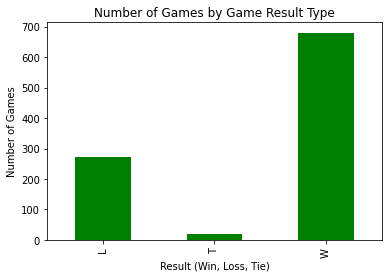

In [ ]:
# bar plot with overall number of wins/losses/ties 
schedule.groupby('Result').size().plot.bar(xlabel="Result (Win, Loss, Tie)", ylabel="Number of Games", title="Number of Games by Game Result Type", color='green')

In [ ]:
# bar plot with overall number of home/away/neutral site games 
schedule.groupby('Game_Type').size().plot.bar(xlabel= "Game Type (Home, Away, Neutral)", ylabel="Number of Games", title="Number of Games by Location Type", rot=30, color='green')

# Plotting Directory Data

In [ ]:
# get list of dataframe columns
directory.info()

## Plotting Categorical Data Using `.groupby()` and `.size()`

In [ ]:
# horizontal bar plot with number of students by country
directory.groupby("Country").size().plot.barh(xlabel='Number of Students', ylabel='Country of Origin', title='Notre Dame Students, 1922-1923 Academic Year, by Country of Origin', color='green')

In [ ]:
# filter dataframe to remove students born in us
subset = directory[directory['Country'] != 'USA']

# show subset
subset

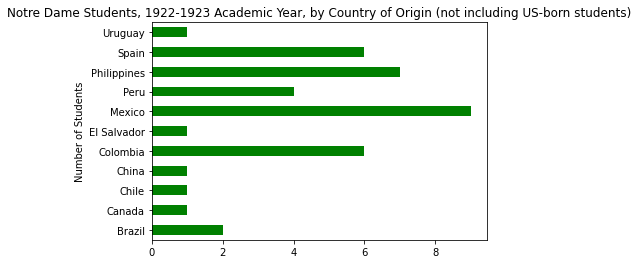

In [ ]:
# horizontal bar plot with number of students by country
subset.groupby("Country").size().plot.barh(xlabel='Number of Students', ylabel='Country of Origin', title='Notre Dame Students, 1922-1923 Academic Year, by Country of Origin (not including US-born students)', color='green')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88b58b1990>],
      dtype=object)

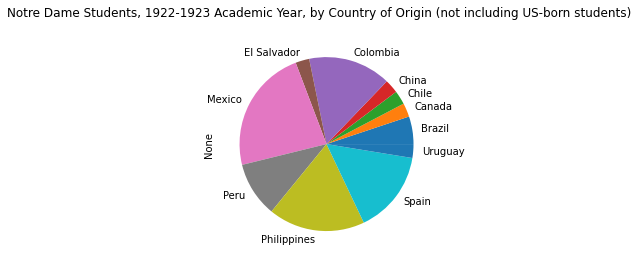

In [ ]:
subset.groupby("Country").size().plot.pie(subplots=True, figsize=(8, 4), title='Notre Dame Students, 1922-1923 Academic Year, by Country of Origin (not including US-born students)')

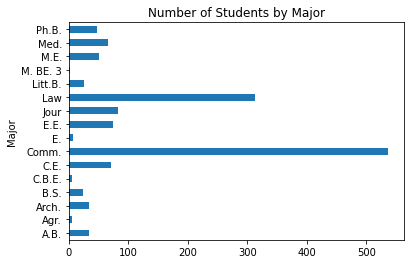

In [ ]:
# bar chart with number of students by major
directory.groupby('Major').size().plot.barh(title='Number of Students by Major')

In [ ]:
# get total number of students by state
subset2 = directory['State'].value_counts().reset_index()

# rename columns
subset2.rename(columns={'index': 'State', 'State': 'Value'}, inplace=True)

# filter out states with less than 20 students
subset2 = subset2[subset2['Value'] > 20]

# show updated dataframe
subset2

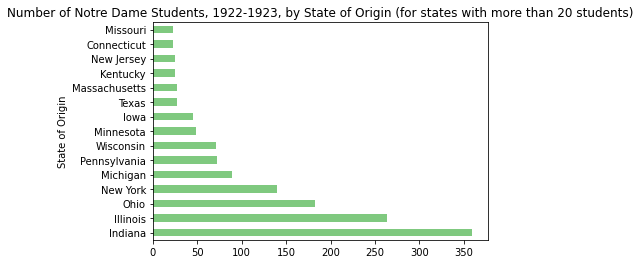

In [ ]:
# horizontal bar chart with number of students by state
subset2.plot.barh(x='State', y='Value', colormap='Accent', legend=False, xlabel='State of Origin', title='Number of Notre Dame Students, 1922-1923, by State of Origin (for states with more than 20 students)')

## Plotting Geospatial Data With `geopandas`, `shapely`, and `matplotlib`

### Convert Data Type for `Latitude` and `Longitude` Columns

In [ ]:
# convert latitude and longitude to numeric field
directory[['Latitude', 'Longitude']] = directory[['Latitude', 'Longitude']].apply(pd.to_numeric, errors='coerce')

# show updated dataframe info
directory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Combined_Name            1633 non-null   object 
 1   Last_Name                1633 non-null   object 
 2   First_Name               1625 non-null   object 
 3   Major                    1370 non-null   object 
 4   Combined_Address         1622 non-null   object 
 5   Street                   1385 non-null   object 
 6   City                     1628 non-null   object 
 7   State                    1606 non-null   object 
 8   Standardized_Address     1629 non-null   object 
 9   Standardized_City_State  1629 non-null   object 
 10  Country                  1629 non-null   object 
 11  Latitude                 1627 non-null   float64
 12  Longitude                1627 non-null   float64
dtypes: float64(2), object(11)
memory usage: 166.0+ KB


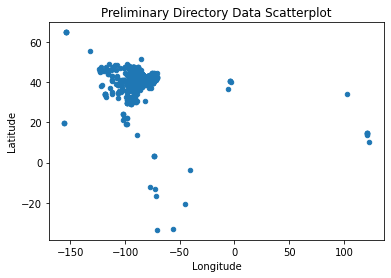

In [ ]:
# scatterplot of latitude and longitude data
directory.plot.scatter(x= "Longitude", y="Latitude", title='Preliminary Directory Data Scatterplot')

In [ ]:
# show available geopandas datasets (for basemaps)
gpd.datasets.available

# world basemap from naturalearth_lowres geopandas dataset
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# show basemap head
world.head()

In [ ]:
# function that takes latitude and longitude columns from dataframe and creates Point field
def make_point(row):
    return Point(row.Longitude, row.Latitude)

points = directory.apply(make_point, axis=1)

# create GeoDataFrame from football data and points geometry
directory_map = gpd.GeoDataFrame(directory, geometry=points)

# set GeoDataFrame coordinate system
directory_map.crs = {'init': 'epsg:4326'}

# show head of GeoDataFrame
directory_map.head()

In [ ]:
# preliminary cartesian coordinate plot of GeoDataFrame
directory_map.plot(figsize=(20,5))

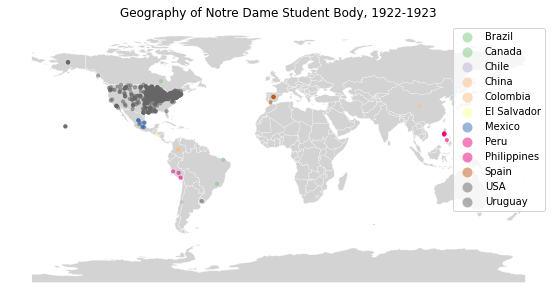

In [ ]:
# create figure axes with world basemap
ax = world.plot(figsize=(15, 5), linewidth=0.25, edgecolor="white", color="lightgrey")

# set axes title
ax.set_title("Geography of Notre Dame Student Body, 1922-1923")

# configure axes
ax.axis('off')

# plot directory data with points colored by country
directory_map.plot(markersize=10, column="Country", cmap='Accent', alpha=0.5, ax=ax, legend=True)

# Plotting ND Football Roster Data

## Basic Plotting Syntax

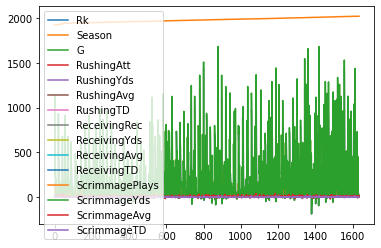

In [ ]:
# basic syntax for plotting from dataframe; default is all numeric fields and a line plot
rosters.plot()

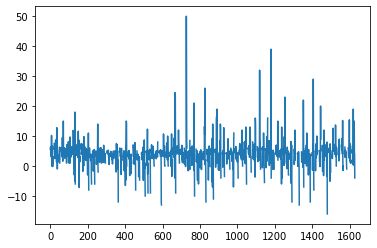

In [ ]:
# basic syntax for plotting single column from dataframe
rosters['RushingAvg'].plot()

## Customizing Plots and Other Plot Types

NOTE: These examples use core `Matplotlib` syntax and various built-in `Matplotlib` stylesheets.
- [Link to more info on stylesheets](https://github.com/kwaldenphd/matplotlib-intro#style-sheets)

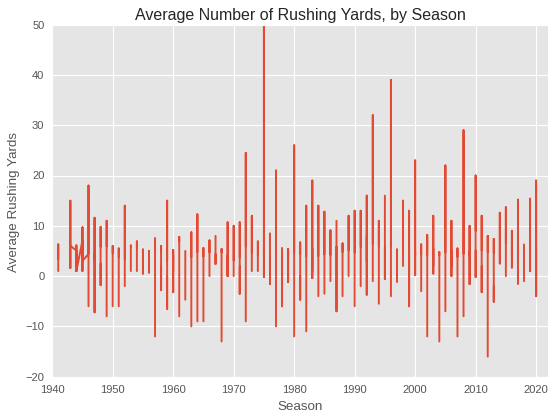

In [ ]:
# set style
plt.style.use('ggplot')

# creat list with 10 year intervals for tickmark placement
ticks = list(range(1940, 2022, 10))

# create figure for new plot
fig, ax = plt.subplots()

# line plot with 'Season' on the X axis and average rushing yards 'RushingAvg' on the Y axis, set x lower/upper limit
rosters.plot.line(x="Season", y="RushingAvg", xlim=(1940, 2022), xticks=ticks, ylabel='Average Rushing Yards', title='Average Number of Rushing Yards, by Season', legend=False, ax=ax)

# set ticklabel format
ax.ticklabel_format(useOffset=False)

plt.show()

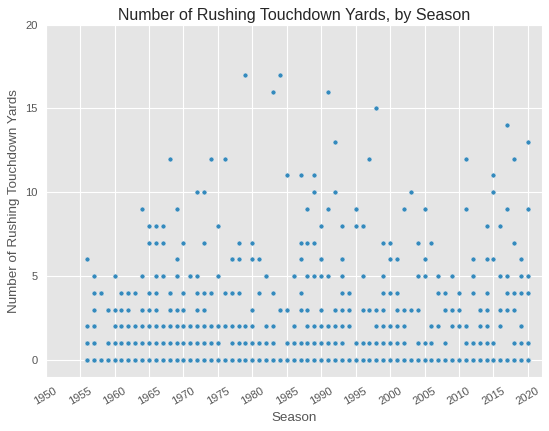

In [ ]:
# set style
plt.style.use('ggplot')

# creat list with 5 year intervals for tickmark placement
ticks = list(range(1950, 2022, 5))

# create figure for new plot
fig, ax = plt.subplots()

# scatterplot with Season on the X axis and Rushing Touchdown Yards 'RushingTD' on the Y axis
rosters.plot.scatter(x='Season', y='RushingTD', xlim=(1950, 2022), ylim=(-1, 20), xticks=ticks, rot=30, ylabel='Number of Rushing Touchdown Yards', title='Number of Rushing Touchdown Yards, by Season', ax=ax)

# set ticklabel format
ax.ticklabel_format(useOffset=False)

# show plot
plt.show()

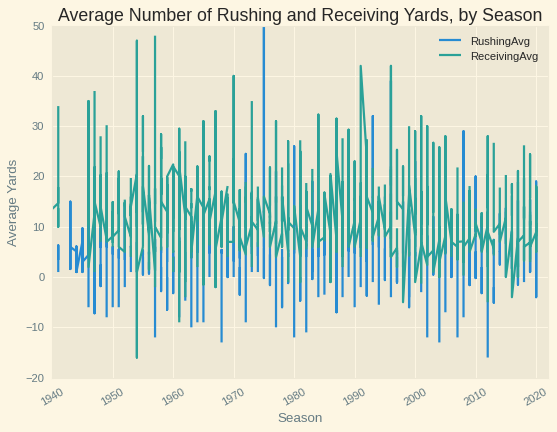

In [ ]:
# set style
plt.style.use('Solarize_Light2')

# create figure for new plot
fig, ax = plt.subplots()

# line plot with 'Season' on the X axis and rushing/receiving average columns on the Y axis
ax = rosters.plot.line(x='Season', y=['RushingAvg', 'ReceivingAvg'], xlim=(1940, 2022), stacked=False, rot =30, ylabel='Average Yards', title='Average Number of Rushing and Receiving Yards, by Season')

# set ticklabel format
ax.ticklabel_format(useOffset=False)

# show plot
plt.show()

# Merging Roster Data and Directory Data

Sample workflow for merging directory data and roster data for single season/academic year (1923-1924).

In [ ]:
# create new dataframe with roster from select seasons
single_yr_roster = rosters[rosters['Season'].isin([1923, 1924])]

# show new dataframe
single_yr_roster.head()

In [ ]:
# new roster dataframe info
single_yr_roster.info()

In [ ]:
# show directory dataframe
directory.head()

In [ ]:
# directory dataframe info
directory.info()

In [ ]:
# SQL style left join in Pandas using merge on first and last name columns
merged_df = pd.merge(single_yr_roster, directory, how='left', left_on=['First_Name', 'Last_Name'], right_on = ['First_Name', 'Last_Name'])

# show merged dataframe
merged_df

In [ ]:
# show merged_df info
merged_df.info()

## Plotting Categorical Data Using `.groupby()` and `.size()`

NOTE: These examples use core `Matplotlib` syntax and various built-in `Matplotlib` stylesheets.
- [Link to more info on stylesheets](https://github.com/kwaldenphd/matplotlib-intro#style-sheets)

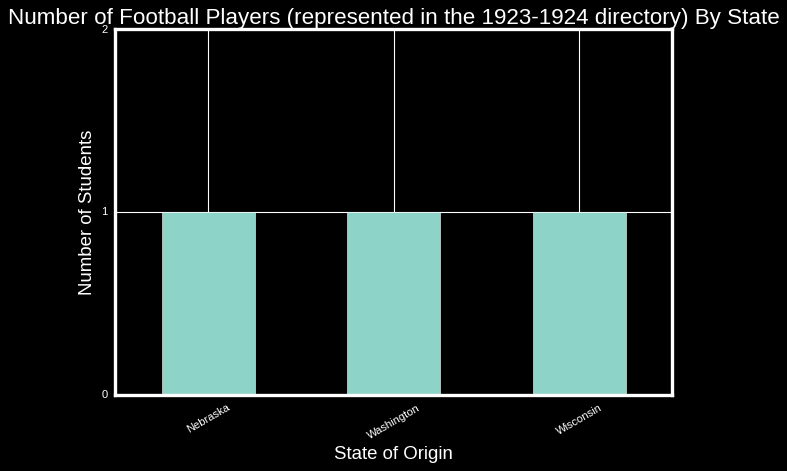

In [ ]:
# set plot style
plt.style.use('dark_background')

# horizontal bar plot with number of football players (represented in the directory) by state
merged_df.groupby("State").size().plot.bar(xlabel='State of Origin', ylabel='Number of Students', rot=30, ylim=(0,2), yticks=(0,1, 2), title='Number of Football Players (represented in the 1923-1924 directory) By State')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88b304f6d0>],
      dtype=object)

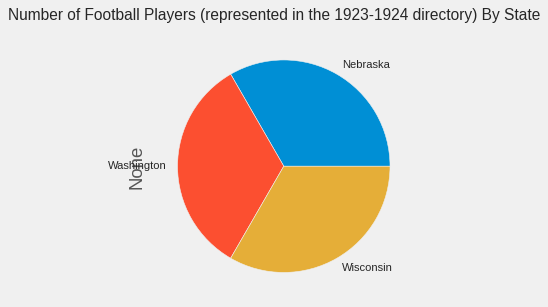

In [ ]:
# set plot style
plt.style.use('fivethirtyeight')

# pie chart with number of football players by state
merged_df.groupby("State").size().plot.pie(subplots=True, figsize=(8, 4), title='Number of Football Players (represented in the 1923-1924 directory) By State')

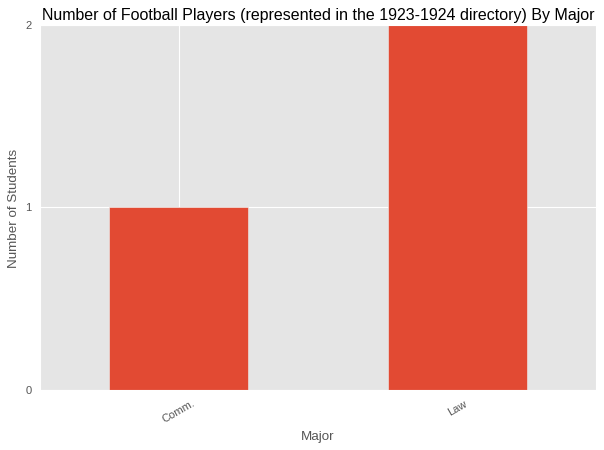

In [ ]:
# set plot style
plt.style.use('ggplot')

# create figure with axes
fig, ax = plt.subplots()

# bar chart with number of students by major
merged_df.groupby('Major').size().plot.bar(rot=30, xlabel='Major', ylabel='Number of Students', ylim=(0, 2), yticks = (0, 1, 2), ax=ax)

# set title
ax.set_title('Number of Football Players (represented in the 1923-1924 directory) By Major', color='black')

# show plot
plt.show()

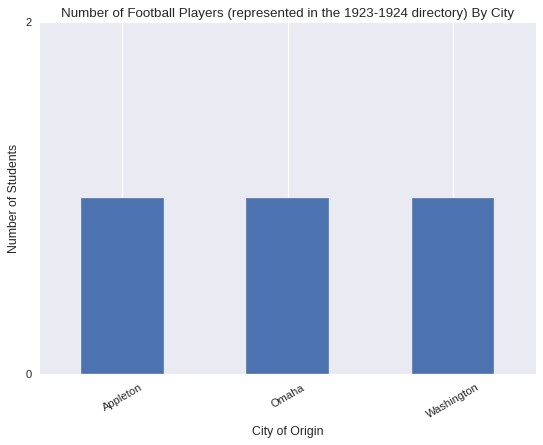

In [ ]:
# set plot style
plt.style.use('seaborn-darkgrid')

# horizontal bar chart with number of students by City
merged_df.groupby("City").size().plot.bar(xlabel='City of Origin', ylabel='Number of Students', rot=30, yticks = (0, 2), title='Number of Football Players (represented in the 1923-1924 directory) By City')